# Aivan mahtava otsikko

JAMK examples #6: 06_ts_sales_revenue_month

Sisältää mm.

- aikasarjan luokittelun aikamääreen perusteella

Ladataan käytettävät paketit.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
Luetaan käytettävä aineisto:

In [2]:
csvUrl = "https://raw.githubusercontent.com/RaimoHaikari/paikkatieto/master/misc/sales_data.csv"
df = pd.read_csv(csvUrl)

df.dtypes

date                object
category            object
sales                int64
price              float64
customer_age         int64
customer_gender     object
dtype: object

Suoritetaan seuraavat toimenpiteet

- muunnetaan date-sarake aikaleimaksi
- lasketaan myyntimäärien ja hintojen perusteella päivittäiset liikevaihdot
- muutetaan aineisto aikasarjaksi

In [5]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
# Calculate the daily revenue
df['revenue'] = df['sales'] * df['price']

df.set_index('date', inplace=True)

Selvitetään kuukausittaiset tuotot.

Nyt ryhmittely ei onnistu dt-accessorin avulla, vaan pitää turvautua resample()-metodiin.

In [11]:
# Resample the data by month and calculate the total revenue
monthly_revenue =  df.resample('M')['revenue'].sum().reset_index()

Erotetaan kuukausi ja vuosi omiin sarakkeisiinsa.

dt-accessori kovassa käytössä:)

In [15]:
# Extract month and year from the 'date' column
monthly_revenue['month'] = monthly_revenue['date'].dt.month_name()
monthly_revenue['year'] = monthly_revenue['date'].dt.year

Lajitellaan aineisto vuoden ja kuukauden perustella.

Huom. kuukauden nimen perusteella ei voi, sillä nimet ovat merkkijonoja, joten siltä osalta lajittelu tarkoittaa aakkosjärjestykseen laittamista.

In [20]:
monthly_revenue.sort_values(['year', 'date'])
# monthly_revenue.dtypes

,date,revenue,month,year
0,2023-01-31,429994.01,January,2023
1,2023-02-28,409486.45,February,2023
2,2023-03-31,461892.44,March,2023
3,2023-04-30,445027.26,April,2023
4,2023-05-31,505869.34,May,2023
5,2023-06-30,414936.04,June,2023


Esityksen kruunaa kuukausittaisen myynnin esittävä pylväskaavio

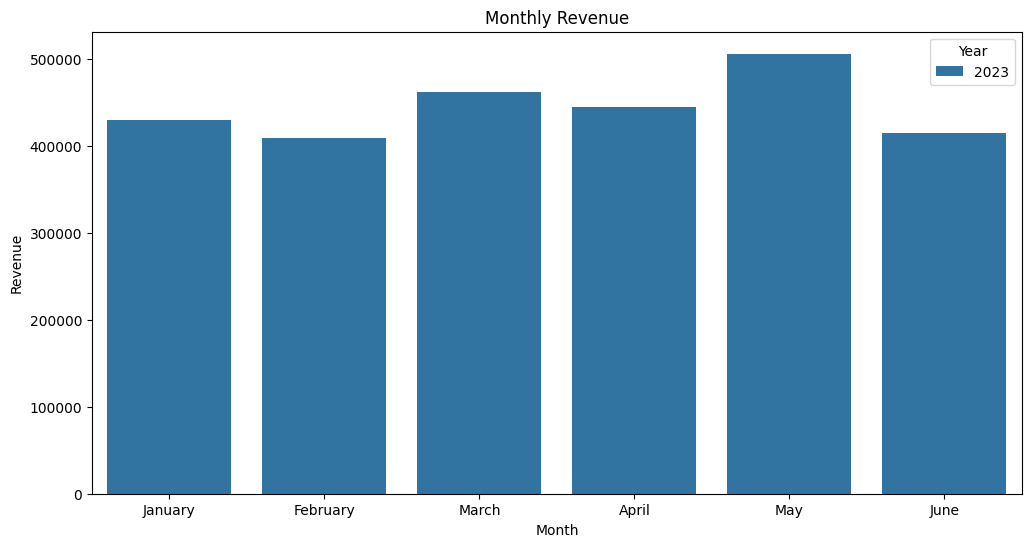

In [21]:
# Visualize monthly revenue using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='revenue', hue='year', data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.legend(title='Year')
plt.show()